In [ ]:
%pip install --upgrade tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, confusion_matrix, roc_curve, auc

print(f"TensorFlow version: {tf.__version__}")

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
TensorFlow version: 2.20.0


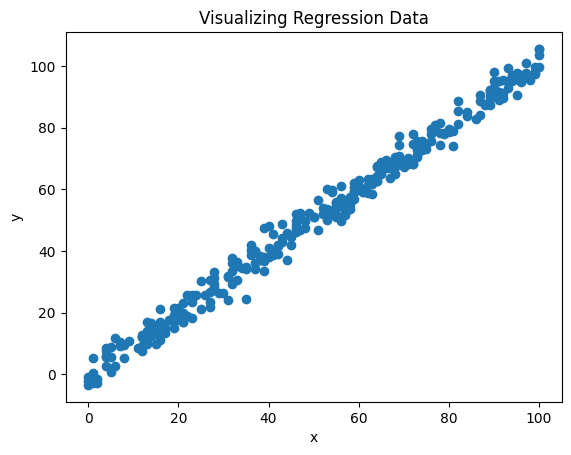

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


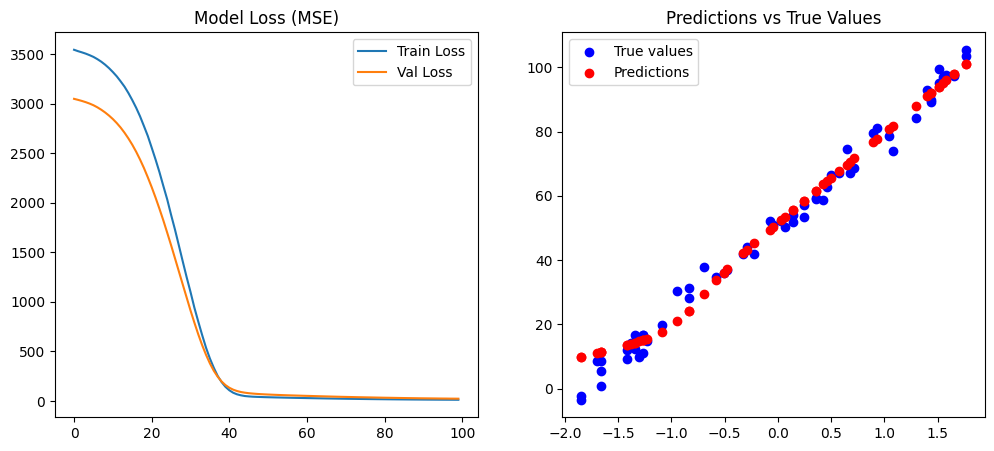

MAE on test set: 3.2428


In [ ]:

import matplotlib.pyplot as plt
df_reg = pd.read_csv("test.csv")

X_reg = df_reg[['x']].values
y_reg = df_reg['y'].values

plt.scatter(X_reg, y_reg)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Regression Data')
plt.show()

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg = model_reg.fit(X_train_r, y_train_r, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.title('Model Loss (MSE)')
plt.legend()

y_pred_r = model_reg.predict(X_test_r)

plt.subplot(1, 2, 2)
plt.scatter(X_test_r, y_test_r, color='blue', label='True values')
plt.scatter(X_test_r, y_pred_r, color='red', label='Predictions')
plt.title('Predictions vs True Values')
plt.legend()
plt.show()

print(f"MAE on test set: {mean_absolute_error(y_test_r, y_pred_r):.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9250


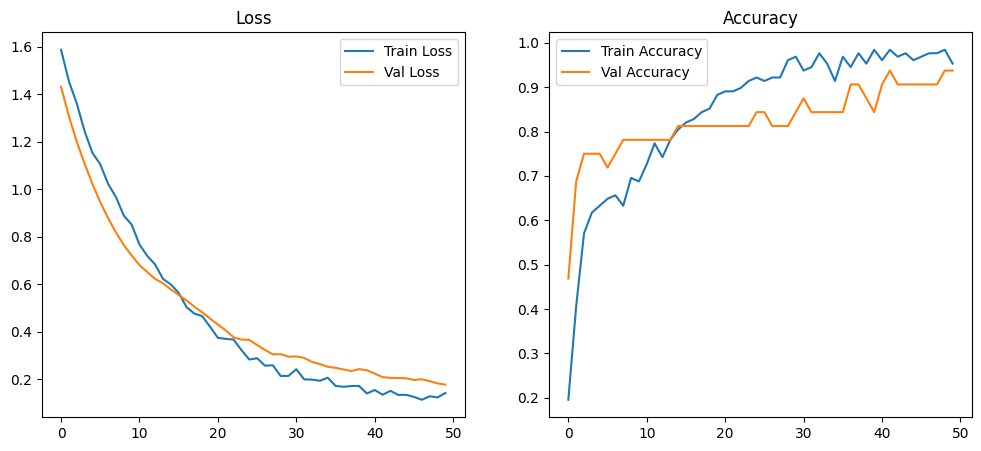

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


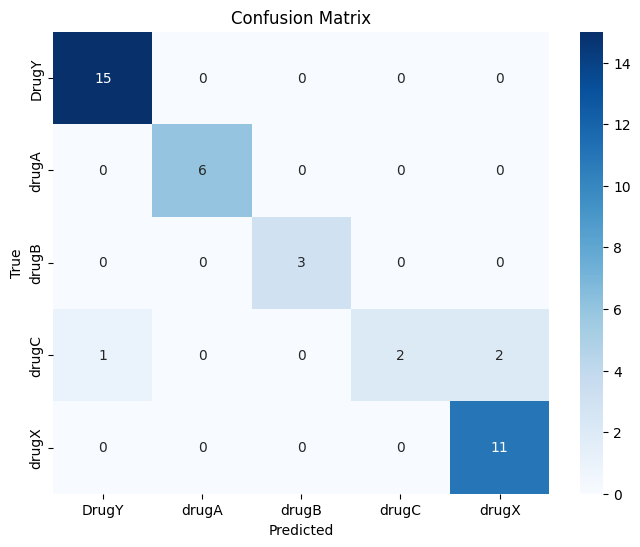

              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.40      0.57         5
       drugX       0.85      1.00      0.92        11

    accuracy                           0.93        40
   macro avg       0.96      0.88      0.89        40
weighted avg       0.93      0.93      0.91        40



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

df_cls = pd.read_csv("drug200.csv")

X_cls = df_cls.drop('Drug', axis=1)
y_cls = df_cls['Drug']

label_encoder = LabelEncoder()
y_cls_encoded = label_encoder.fit_transform(y_cls)
y_cls_categorical = tf.keras.utils.to_categorical(y_cls_encoded)

categorical_features = ['Sex', 'BP', 'Cholesterol']
numerical_features = ['Age', 'Na_to_K']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_cls_processed = preprocessor.fit_transform(X_cls)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls_processed, y_cls_categorical, test_size=0.2, random_state=42)

num_classes = y_cls_categorical.shape[1]

model_cls = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_c.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_cls.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_cls = model_cls.fit(X_train_c, y_train_c, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

loss, accuracy = model_cls.evaluate(X_test_c, y_test_c, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cls.history['loss'], label='Train Loss')
plt.plot(history_cls.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cls.history['accuracy'], label='Train Accuracy')
plt.plot(history_cls.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

y_pred_probs = model_cls.predict(X_test_c)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_c, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))